# Generating Fashion Designs


There are many ways to download the dataset, here two are going to be displayed. Using kaggle API or calling if from Tensorflow.

# Download Datasets

## 1) Using Kaggle API
As first step we have to install de kaggle API.

In [0]:
!pip install -q kaggle

Then, we are going to save the API key in order to use the API.

In [5]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Download 100%.


In case it does not work, please "reset all runtimes", not restart.

Source: ["404 - Not Found" when downloading dataset from Google Colab](https://github.com/Kaggle/kaggle-api/issues/110)

In [7]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games             17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           2268  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          31594  
gustavomodelli/forest-fires-in-brazil                     Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           3526  
shuyangli94/food-com-recipes-and-user-interactions        Food.com Recipes and Interactions                  261MB  2019-10-12 06:30:37           1135  
rajeevw/ufcdata                                           UFC-Fight historical dat

- Now, the Datasets from Kaggle
[Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist) will be downloaded.
It is available in [GitHub](https://github.com/zalandoresearch/fashion-mnist).

- Another Fashion Image Dataset is [DeepFashion2](https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset).

In [9]:
!kaggle datasets list -s zalando

ref                                               title                                 size  lastUpdated          downloadCount  
------------------------------------------------  -----------------------------------  -----  -------------------  -------------  
zalando-research/fashionmnist                     Fashion MNIST                         69MB  2017-12-07 00:54:20          46479  
datamunge/sign-language-mnist                     Sign Language MNIST                   63MB  2017-10-20 15:09:18          14860  
sanjeet41/fashionmnist-train                      Fashion-mnist_train                   34MB  2018-07-11 05:19:32            447  
kenichinakatani/fashon-mnist-train-and-test-data  Fashon_MNIST train and test data      39MB  2017-12-20 08:25:19             58  
bahadir60/mnistfashion                            MNIST FASHION                         22MB  2017-09-28 16:31:26             81  
dqmonn/zalando-store-crawl                        Clothing & Models                

In [12]:
!kaggle datasets download -d zalando-research/fashionmnist

 83% 57.0M/68.8M [00:00<00:00, 161MB/s]
100% 68.8M/68.8M [00:00<00:00, 172MB/s]


The Data has been downloaded in .zip file, then we have to unzip them.

In [13]:
!yes | unzip fashionmnist.zip

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


## 2) Using Tensorflow

Begin by downloading the fashion MNIST dataset using tf.keras.datasets, as shown below.

In [0]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU

%matplotlib inline
import distutils

if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

#Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## Data Visualization

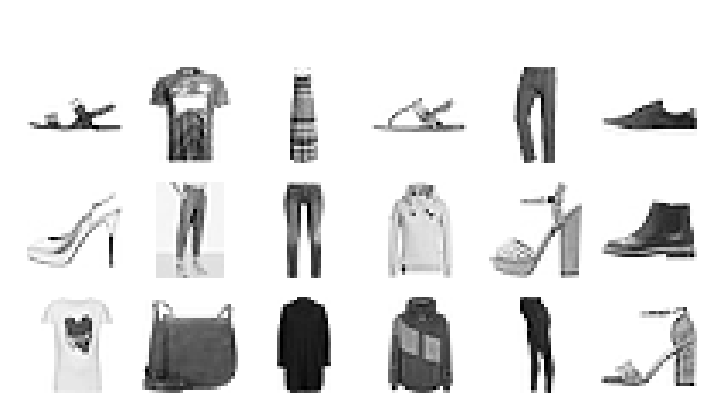

In [174]:
#Number of samples
nb_samples = x_train.shape[0]

#Labels
LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

#Plot size Configuration
rows = 3
cols = 6
size_w = 2
size_h = 2

fig, ax = plt.subplots(rows, cols, figsize=(cols*size_w, rows*size_h))
#fig.patch.set_facecolor('xkcd:darkgreen')
plt.suptitle('Dataset Zalando Fashion MNIST', fontsize=30, color="white", y=1.02)

for idx in range(0, rows*cols):
    i = random.randint(0, nb_samples - 1)
    # tittle = 'ID: {}, Item: {} '.format(i, LABEL_NAMES[y_train[i]])
    tittle = 'Item: {} '.format(LABEL_NAMES[y_train[i]])
    
    img = x_train[i]

    ax[idx//cols,idx%cols].imshow(img, cmap='Greys')
    ax[idx//cols,idx%cols].axis('off')
    ax[idx//cols,idx%cols].set_title(tittle, color="white", fontsize=12)

plt.show()

# Create a Model
The second option using tensorflow will be used to continue de solution.

In [0]:
# Normalize, Rescale -1 to 1
x_train = x_train/127.5-1

# add empty color dimension
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
x_train = np.expand_dims(x_train, axis=3)

latent_dim = 100

## Define the model

### Generator

In [190]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=latent_dim))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(latent_dim,))
  img = model(noise)

  return Model(noise, img)

# Build the generator
generator = create_generator()

# The generator takes noise (1x100) as input and generates imgs (28x28)
z = Input(shape=(latent_dim,))
print(z.shape)
img = generator(z)
print(img.shape)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dense_53 (Dense)             (None, 1024)            

### Discriminator

In [182]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

# Build and compile the discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
# For the combined model we will only train the generator
discriminator.trainable = False

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________________________

In [192]:
# The discriminator takes generated images as input (28x28) and determines validity (bool)
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

(?, 1)


In [0]:
# Plot images during training
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, latent_dim))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

## Train 

0 [D loss: 0.478093, acc.: 79.69%] [G loss: 1.523087]


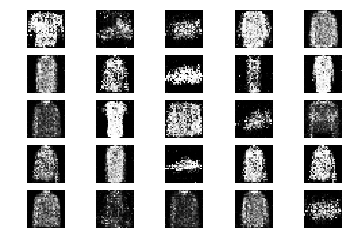

1000 [D loss: 0.488143, acc.: 68.75%] [G loss: 1.257824]


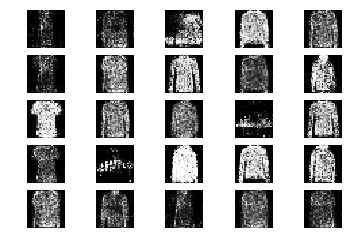

2000 [D loss: 0.354146, acc.: 85.94%] [G loss: 1.438635]


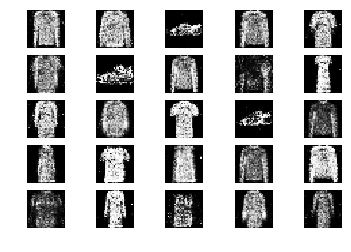

3000 [D loss: 0.556067, acc.: 64.06%] [G loss: 1.218663]


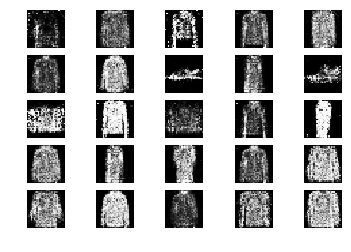

4000 [D loss: 0.596598, acc.: 65.62%] [G loss: 1.068893]


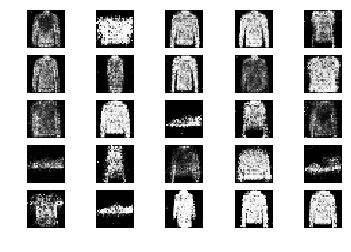

5000 [D loss: 0.562981, acc.: 71.88%] [G loss: 1.192821]


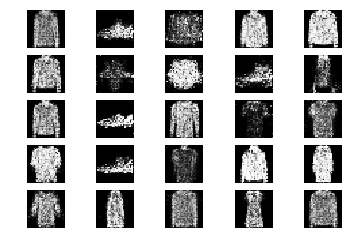

In [0]:
# Hyperparamteres
epochs = 10000
batch_size = 32

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # ---------------------
  # Train Discriminator
  # ---------------------
  # Select a random batch of images (batch_size, 28, 28)
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  # [INPUT -> (32, 28, 28)]
  imgs = x_train[idx]

  # [INPUT]
  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Generate a batch of new images
  gen_imgs = generator.predict(noise)

  # Train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # ---------------------
  #  Train Generator
  # ---------------------
  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Train the generator (to have the discriminator label samples as valid)
  g_loss = combined.train_on_batch(noise, valid)

  # If at save interval => save generated image samples
  if epoch % 1000 == 0:
    print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
    sample_images(epoch)

## Result visualization

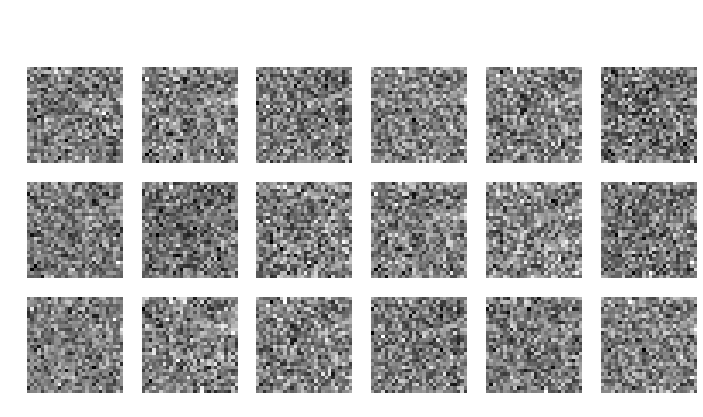

In [198]:
# Create 25 Images
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, latent_dim))
gen_imgs = generator.predict(noise)

# Rescale images 0 - 1
gen_imgs = 0.5*gen_imgs+0.5

# Number of samples
nb_samples = gen_imgs.shape[0]

# Plot size Configuration
rows = 3
cols = 6
size_w = 2
size_h = 2

fig, ax = plt.subplots(rows, cols, figsize=(cols*size_w, rows*size_h))
#fig.patch.set_facecolor('xkcd:darkgreen')
plt.suptitle('Generated Images', fontsize=30, color="white", y=1.02)

for idx in range(0, rows*cols):
    i = random.randint(0, nb_samples - 1)
    tittle = 'Item: {}'.format(i)
    img = gen_imgs[i, :, :, 0]

    ax[idx//cols,idx%cols].imshow(img, cmap='gray')
    ax[idx//cols,idx%cols].axis('off')
    ax[idx//cols,idx%cols].set_title(tittle, color="white", fontsize=12)

plt.show()

# Useful Links
- [Kaggle Appi Manual](https://www.kaggle.com/docs/api)

### Used Sources:
- [FlorianWoelki/fashion_mnist_gan](https://github.com/FlorianWoelki/fashion_mnist_gan/blob/master/fashion_mnist_gan.ipynb)
- [GAN_fashion_MNIST](https://github.com/R-Suresh/GAN_fashion_MNIST/blob/master/gan.py)
- [Fashion MNIST with Keras and TPUs](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb#scrollTo=MICrRv8rmXVq)